# Thought Experiment

Here is a thought experiment I conducted to check the suitability of DBSCAN algorithm for the given cohesive clustering approach.

# Imports

In [1]:
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN
import numpy as np
import matplotlib.pyplot as plt

Estimated no. of clusters: 2
Estimated no. of noise points: 0


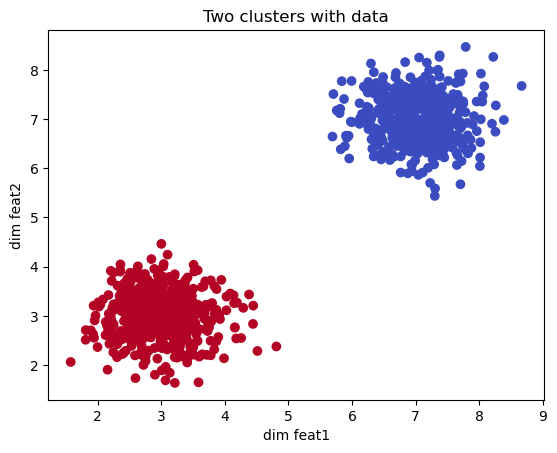

In [2]:
# Configuration options
num_samples_total = 1000
cluster_centers = [(3,3), (7,7)]
num_classes = len(cluster_centers)
epsilon = 1.0
min_samples = 13

# Generate dummy dataset
X, y = make_blobs(n_samples = num_samples_total, 
                  centers = cluster_centers, 
                  n_features = num_classes, 
                  center_box=(0, 1), 
                  cluster_std = 0.5)

# Compute DBSCAN
dbscan = DBSCAN(eps=epsilon, min_samples=min_samples).fit(X)
labels = dbscan.labels_

no_clusters = len(np.unique(labels) )
no_noise = np.sum(np.array(labels) == -1, axis=0)

print('Estimated no. of clusters: %d' % no_clusters)
print('Estimated no. of noise points: %d' % no_noise)

# Generate scatter plot for training data
colors = list(map(lambda x: '#3b4cc0' if x == 1 else '#b40426', labels))
plt.scatter(X[:,0], X[:,1], c=colors, marker="o", picker=True)
plt.title('Two clusters with data')
plt.xlabel('dim feat1')
plt.ylabel('dim feat2')
plt.show()

# Getting cluster centroids

- DBSCAN is a density-based clustering approach, hence there is no notion of cluster centroids.
- So the resulting clusters can have any shape, as long as there are points close enough to each other, calculating centroids in this way would be applicable.
- Clusters should form blob shapes that are seperated from each other like the above picture

In [3]:
cluster_0_points = X[labels==0, :]
cluster_1_points = X[labels==1, :]
print(cluster_0_points.shape)
print(cluster_1_points.shape)

(500, 2)
(500, 2)


In [4]:
centroid_of_cluster_0 = np.mean(cluster_0_points, axis=0) 
print(centroid_of_cluster_0)

centroid_of_cluster_1 = np.mean(cluster_1_points, axis=0) 
print(centroid_of_cluster_1)

[3.0032394  3.01652146]
[7.02467604 7.00493133]


So computed cluster centroids are almost closer to the actual centroids: `(3,3), (7,7)`. As stated previously, as long as the resulted clusters have convex shape, this method is valid!

In [7]:
# Lets do this iteratively
import numpy as np

cluster_centroids = []
for label in np.unique(labels).tolist():
    cluster_centroids.append(np.mean(X[labels==label, :], axis=0).tolist())

cluster_centroids

[[3.0032393955197523, 3.0165214562567955],
 [7.024676044422082, 7.004931331271243]]